<a href="https://colab.research.google.com/github/ShalilG/Stock-Market-Analysis/blob/main/MeanReversionTradingStrategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 748 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [4]:
pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ta: filename=ta-0.10.1-py3-none-any.whl size=28985 sha256=91981936ca18aabd8e493422c2cf9e47589cb832382d300681b83361b06c5d88
  Stored in directory: /root/.cache/pip/wheels/bc/2a/c2/a56e77d07edc16a1fa7fb012667e55cb0643cfa65996bddecc
Successfully built ta


In [5]:
import pandas as pd 
import numpy as np 
import yfinance as yf
import ta
import matplotlib.pyplot as plt


In [8]:
df = yf.download('SQ', start = '2018-12-31')


[*********************100%***********************]  1 of 1 completed


In [9]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,56.439999,57.349998,55.459999,56.090000,56.090000,13258800
2019-01-02,54.099998,57.830002,53.560001,57.200001,57.200001,13434000
2019-01-03,55.580002,56.730000,52.259998,52.419998,52.419998,19076300
2019-01-04,54.400002,59.660000,53.861000,58.180000,58.180000,30228600
2019-01-07,59.000000,61.290001,58.049999,60.720001,60.720001,18146900
...,...,...,...,...,...,...
2022-08-08,88.050003,91.800003,84.870003,85.500000,85.500000,19001500
2022-08-09,84.180000,84.870003,79.949997,81.129997,81.129997,13287000
2022-08-10,86.760002,89.029999,84.419998,88.839996,88.839996,16527800


In [10]:
df['ma_20'] = df.Close.rolling(20).mean()
df['vol'] = df.Close.rolling(20).std()
df['upper_bb'] = df.ma_20 + (2*df.vol)
df['lower_bb'] = df.ma_20 - (2*df.vol)

In [11]:
df

,Open,High,Low,Close,Adj Close,Volume,ma_20,vol,upper_bb,lower_bb
Date,,,,,,,,,,
2018-12-31,56.439999,57.349998,55.459999,56.090000,56.090000,13258800,NaN,NaN,NaN,NaN
2019-01-02,54.099998,57.830002,53.560001,57.200001,57.200001,13434000,NaN,NaN,NaN,NaN
2019-01-03,55.580002,56.730000,52.259998,52.419998,52.419998,19076300,NaN,NaN,NaN,NaN
2019-01-04,54.400002,59.660000,53.861000,58.180000,58.180000,30228600,NaN,NaN,NaN,NaN
2019-01-07,59.000000,61.290001,58.049999,60.720001,60.720001,18146900,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-08-08,88.050003,91.800003,84.870003,85.500000,85.500000,19001500,74.183000,8.397914,90.978829,57.387171
2022-08-09,84.180000,84.870003,79.949997,81.129997,81.129997,13287000,74.988000,8.244607,91.477213,58.498787
2022-08-10,86.760002,89.029999,84.419998,88.839996,88.839996,16527800,76.222499,8.383672,92.989843,59.455156


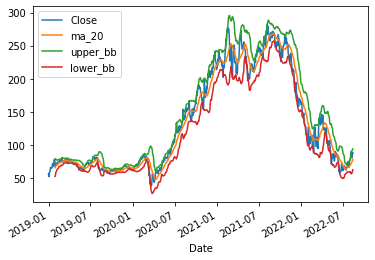

In [12]:
df[['Close', 'ma_20', 'upper_bb', 'lower_bb']].plot()

In [13]:
df['rsi'] = ta.momentum.rsi(df.Close, window = 6)

In [14]:
conditions = [(df.rsi < 30) & (df.Close < df.lower_bb), 
              (df.rsi > 70) & (df.Close > df.upper_bb)]

In [15]:
choices = ['Buy', 'Sell']

In [16]:
df['signal'] = np.select(conditions, choices)

In [17]:
df.dropna(inplace=True)

In [19]:
df.tail(50)

,Open,High,Low,Close,Adj Close,Volume,ma_20,vol,upper_bb,lower_bb,rsi,signal
Date,,,,,,,,,,,,
2022-06-02,81.519997,88.848999,81.400002,87.440002,87.440002,19120000,83.813501,6.156090,96.125680,71.501321,55.263649,0
2022-06-03,85.360001,86.669998,82.660004,83.099998,83.099998,13960600,83.191000,5.501506,94.194013,72.187988,46.986019,0
2022-06-06,84.860001,87.089996,81.949997,83.379997,83.379997,13972700,82.550500,4.576379,91.703259,73.397741,47.593730,0
2022-06-07,81.879997,85.199997,80.250000,84.599998,84.599998,14313300,82.587500,4.590494,91.768487,73.406513,50.557164,0
2022-06-08,84.599998,87.550003,83.870003,84.750000,84.750000,12757300,82.605500,4.598632,91.802764,73.408236,50.966259,0
2022-06-09,84.629997,84.959999,76.489998,76.580002,76.580002,19594300,82.873500,4.019960,90.913420,74.833580,33.078026,0
2022-06-10,75.860001,76.239998,70.230003,71.870003,71.870003,21288000,82.679000,4.453030,91.585059,73.772941,26.615534,Buy
2022-06-13,66.160004,68.779999,62.500000,62.759998,62.759998,26455800,81.609500,6.276465,94.162429,69.056571,18.311839,Buy
2022-06-14,63.520000,63.689999,59.450001,60.299999,60.299999,23258500,80.639500,7.881079,96.401658,64.877342,16.630557,Buy


In [20]:
df.signal = df.signal.shift()

In [38]:
position = False
buydates,selldates = [],[]
buyprices,sellprices = [],[]

for index, row in df.iterrows():
  if not position and row['signal'] == 'Buy':
    buydates.append(index)
    buyprices.append(row.Open)
    position = True

  if position:
    if row['signal'] == 'Sell' or row.shifted_close < 0.95 * buyprices[-1]:
      selldates.append(index)
      sellprices.append(row.Open)
      position = False


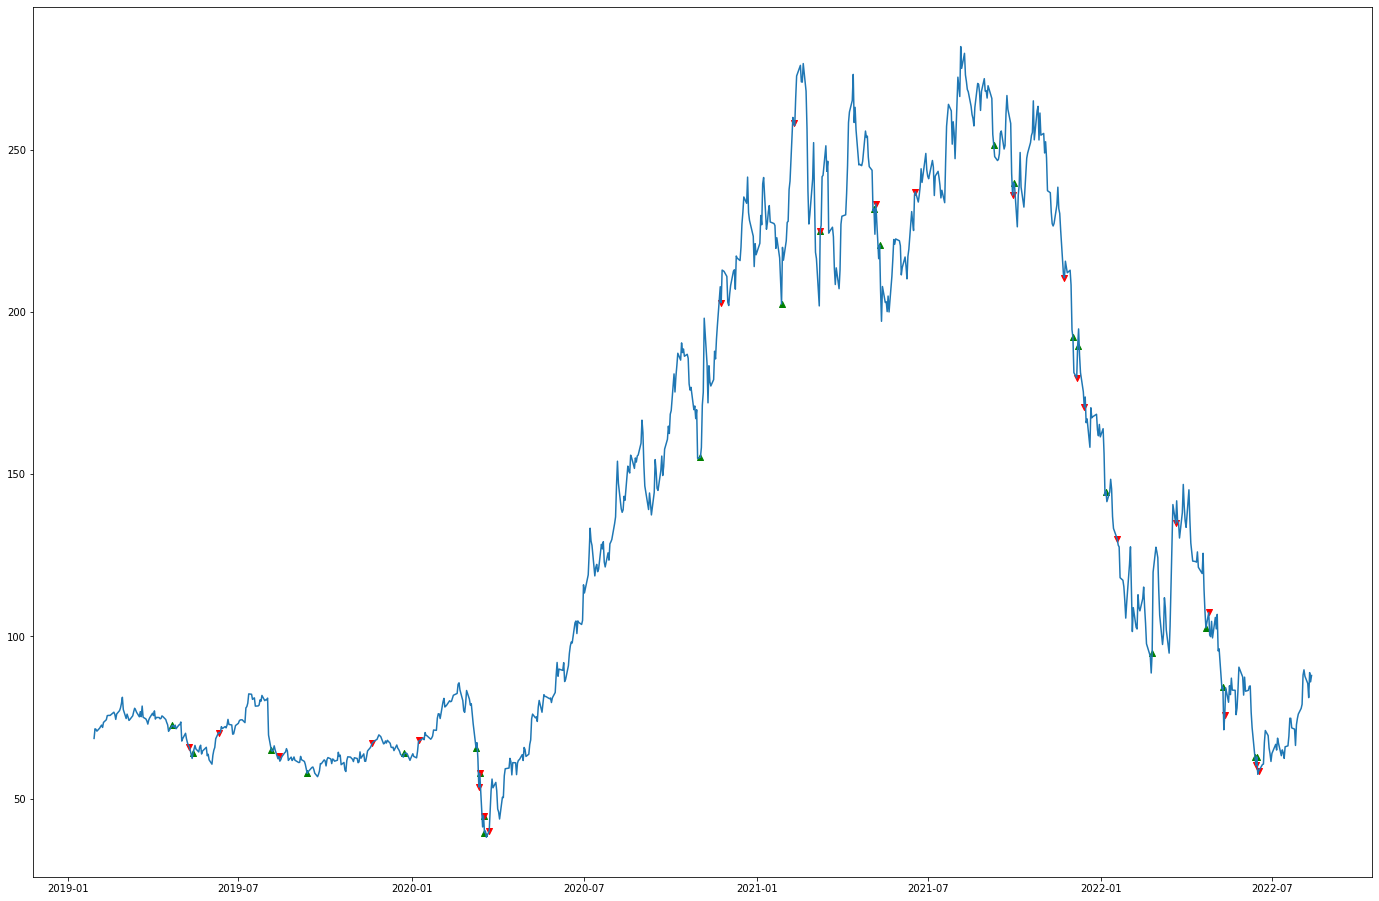

In [39]:
plt.figure(figsize=(24,16))
plt.plot(df.Close)
plt.scatter(df.loc[buydates].index, df.loc[buydates].Close, marker ='^', c='g')
plt.scatter(df.loc[selldates].index, df.loc[selldates].Close, marker ='v', c='r')

In [42]:
(pd.Series([(sell - buy)/buy for sell,buy in zip(sellprices,buyprices)]) + 1).prod() - 1

0.24334292149426195

In [41]:
df['shifted_close'] = df.Close.shift()